 # Сборный проект №1

# Исследование интернет-магазине «Стримчик»

В работе в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимио выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Нужно отработать принцип работы с данными. У нас данные до 2016 года, и вы планируем кампанию на 2017-й.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


**Цель исследования:**
1. Посмотрить, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
2. Посмотрить, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
3. Взять данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывайте в работе данные за предыдущие годы.
4. Какие платформы лидируют по продажам, растут или падают? Выбрать несколько потенциально прибыльных платформ.
5. Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описать результат.
6. Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
7. Соотнесите выводы с продажами игр на других платформах.
8. Посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

**Ход исследования**

Данные о поведении пользователей я получил из файла `/datasets/games.csv`. О качестве данных ничего не известно. Поэтому перед проверкой гипотез понадобится обзор данных. 

Я проверите данные на ошибки и оценю их влияние на исследование. Затем, на этапе предобработки  буду искать инструменты для исправление самых критичных ошибок данных, которые могут привести к искажению конечного результата. Добавлю в таблицу новые столбцы для проведения исследования.
 
Таким образом, исследование пройдёт в несколько этапов:
 - Обзор данных.
 - Предобработка данных.
 - Проведение исследовательского анализа данных.
 - Составление портрет пользователя каждого региона.
 - Проверка гипотез.
 - Общий вывод.
 
**Описание данных**

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы долларов)
- EU_sales — продажи в Европе (миллионы долларов)
- JP_sales — продажи в Японии (миллионы долларов)
- Other_sales — продажи в других странах (миллионы долларов)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Обзор данных

**Подключим библиотеки необходимые для работы**

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind
import seaborn as sns
from scipy import stats as st
from pylab import *
import warnings
warnings.filterwarnings("ignore")

**Установим опции по выводу в датафрейме**

In [2]:
pd.set_option('display.max_colwidth', None) # для полноформатного отборажения таблиц
pd.set_option('display.float_format', '{:.2f}'.format) #все числа отражаются с двумя знаками после запятой

### Ознакомимся с данными

**Откроем файл**

In [3]:
try:
    df = pd.read_csv('/datasets/games.csv')
except:
     print('Something is wrong')  

**Посмотрим первые и последние 5 строк таблицы с данными**

In [4]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009.00,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
df.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.00,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.00,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.00,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.00,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.00,Simulation,0.00,0.00,0.01,0.00,NaN,NaN,NaN


В первых 10 строках уже немало пропусков.

### Ознакомимся с типом данных и общей информацией по датафрейму

In [6]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Пропусков много. Посмотрим их подробнее чуть ниже.

**В каких столбцах меняем типы данных**

- **User_Score** - это же численный показатель, а имеет тип object - меняем на 'float'.
- **Year_of_Release** - это же временной показатель, а имеет тип float - меняем на 'int'.

Остальные типы столбцов в порядке.

 **Проверяем значения в датафрейме**

In [7]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.00,16715.00,16715.00,16715.00,16715.00,8137.00
mean,2006.48,0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,1980.00,0.00,0.00,0.00,0.00,13.00
25%,2003.00,0.00,0.00,0.00,0.00,60.00
50%,2007.00,0.08,0.02,0.00,0.01,71.00
75%,2010.00,0.24,0.11,0.04,0.03,79.00
max,2016.00,41.36,28.96,10.22,10.57,98.00


**Информация о пропусках**

In [8]:
pd.DataFrame(round(df.isna().mean()*100), columns = ['mean, %']).reset_index().style.background_gradient('coolwarm')

,index,"mean, %"
0,Name,0.000000
1,Platform,0.000000
2,Year_of_Release,2.000000
3,Genre,0.000000
4,NA_sales,0.000000
5,EU_sales,0.000000
6,JP_sales,0.000000
7,Other_sales,0.000000
8,Critic_Score,51.000000
9,User_Score,40.000000


Практически половина данных отсутствует по столбцам critic_score, rating и user_score. Такая важная описательная характеристика данных как среднее значение количества пропусков в столбце равна 12%.

## **Вывод**

- **critic_score** - оценка критиков - оценка игр походит не быстро, а может даже вообще не пройти, так что по всему миру крупные агенства по рейтингу игр могут не оставить оценку. Было бы неправильно заполнить рейтинг игры средним или медианой, даже если бы мы их считали внутри для каждого жанра отдельно.

- **rating** - рейтинг от ESRB - может быть, в те времена не было такой организации, вот и рейтинга от неё тоже нет.    Заполним рейтинг игре, найдя самое популярное возрастное ограничение для жанра. 

- **user_score** - причины, вероятно, ранее не было сервисов, которые собирали бы рейтинги игроков. Поэтому и присутствуют пропуски. Поступим так же, как и со столбцом critic_score.

- **year_of_release** - год выпуска. Имеет 2% пропусков. Не много, но всё же есть. Средними/медианами эти пропуски не заполнить, эти данные не являются самыми важными для анализа данных, да и пропусков в столбце не так много. Другими словами, целых данных достаточно для анализа, поэтому можно избавиться от пустых данных.

Ни по одному столбцу заполнить пропуски хотя бы усредненными данными не представляется возможным. Тем не менее, заполним их "нереальными" данными для возможности спокойно работать с этими строками по другим параметрам.

**Проверим, данные по старым играм, есть ли эти пропуски**

In [9]:
df.query('Critic_Score.isnull() & Rating.isnull() & User_Score.isnull()')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.00,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.00,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.00,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.00,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.00,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.00,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.00,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Предположение неверно. По довольно новым играм есть такие же пропуски.

## Предобработка данных

### Стиль заголовков

 **Для удобства работы приведем названия столбцов к нижнему регистру**

In [10]:
df.columns = df.columns.str.lower()

### Изменение типа данных

**Изменение типа данных по столбцу user_score**

Посмотрим отдельно столбцы user_score.

Его формат 'object, что очень странно. Ведь если бы там были только числа и NaN, то формат был бы 'float'.

In [11]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Кроме пропусков, присутствует значение "tbd". Посмотрим, сколько таких значений.

In [12]:
df[df['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.00,Sports,3.45,2.59,0.00,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.00,Misc,2.08,1.35,0.00,0.54,61.00,tbd,E10+
520,Zumba Fitness 2,Wii,2011.00,Sports,1.51,1.03,0.00,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.00,Misc,1.65,0.57,0.00,0.20,71.00,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.00,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.00,Action,0.01,0.00,0.00,0.00,67.00,tbd,E
16697,Bust-A-Move 3000,GC,2003.00,Puzzle,0.01,0.00,0.00,0.00,53.00,tbd,E
16698,Mega Brain Boost,DS,2008.00,Puzzle,0.01,0.00,0.00,0.00,48.00,tbd,E
16704,Plushees,DS,2008.00,Simulation,0.01,0.00,0.00,0.00,NaN,tbd,E


Почитав FAQ Metacritic, найдем, что это аббревиатура от **To Be Determined**. Пишется тогда, когда игра имеет недостаточное количество отзывов (менее 4) для подсчета рейтинга пользователей и его публикации.

Предполагаю, что с таким можно столкнуться, когда анализируешь или малопопулярные игры, или игры, имеющие приоисхождение и, соответственно, аудиторию, большая часть игроков которых не разговаривает по-английски и не оставляет свои отзывы на таких мировых сайтах как Metacritic. Как пример можно привести японские игры и их аудитораю - вряд ли много японских игроков заходят на Metacritic, чтобы написать отзыв на языке, которым они практически не владеют. Они оценивают свои игры на популярных у себя ресурсах.

In [13]:
df['user_score'] = df['user_score'].replace('tbd', np.NaN)
df['user_score'] = df['user_score'].astype('float')

In [14]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

**Изменение типа данных по столбцу user_score**

Заполняем пропущенные значения в столбце 'year_of_release' нулями, чтобы можно были изменить тип данных.

In [15]:
#df['year_of_release'] = df['year_of_release'].fillna(0)
#df['year_of_release'] = df['year_of_release'].astype('Int64')

**Изменение типа данных по столбцу critic_score**

In [16]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [17]:
df['critic_score'] = df['critic_score'].astype('Int64')

Данные целочисленные, поэтому имеет смысл поменять тип данных.

### Обработка пропусков

**Исследование данных столбца year_of_release**

In [18]:
df['year_of_release'].isna().sum()

269

In [19]:
df = df.dropna(subset = ['year_of_release'])

Заполняем пропущенные значения в столбце 'year_of_release' нулями, чтобы можно были изменить тип данных.

In [20]:
df['year_of_release'] = df['year_of_release'].astype('Int64')

**Исследование данных столбца name**

In [21]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,<NA>,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,<NA>,NaN,NaN


In [22]:
df = df.dropna(subset = ['name'])

In [23]:
df.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

**Исследование данных столбца rating**

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг для игр и другого развлекательного программного обеспечения в США и Канаде. Работает c 1994 года.
В интернете удалось получить определения для представленных рейтингов.

Возрастной рейтинг: 
+ «EC» («Early childhood») — «Для детей младшего возраста»;
+ «E» («Everyone») — «Для всех»;
+ «E10+» («Everyone 10 and older») — «Для всех старше 10 лет»;
+ «T» («Teen») — «Подросткам 13—19 лет» 
+ «M» («Mature») — «От 17 лет»;
+ «AO» («Adults Only 18+») — 18+;
+ «RP» ( «Rating Pending»») — «Рейтинг ожидается».

In [24]:
df['rating'].isna().sum()

6676

In [25]:
df['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

Этот рейтинг изначально был известен как Kids to Adults (K-A) до 1998 года. C 1998 по настоящее время переименован в E.

Добавим его в рейтинг Е.

In [26]:
df.loc[df['rating'].isin(['K-A']), 'rating'] = 'E'

Восстановливать рейтинг ESRB не имеет возмжоным, так как игра для каждой платформы и жанра рассматривается отдельно. Выдается рейтинг в частном порядке. 

Пропуски есть независимо от того новая это игра или старая, на какой платформе можно в нее поиграть, а также жанры встречаются разные. Удалить строки с пропусками мы не можем, так как они составляют почти половину датасета. В данном случае следует поставить "заглушку".

In [27]:
df['rating'] = df['rating'].fillna('Unknown')
df.rating.value_counts()

Unknown    6676
E          3924
T          2905
M          1536
E10+       1393
EC            8
RP            1
AO            1
Name: rating, dtype: int64

**Вывод**

Для определения рейтинга издатель присылает в ESRB видеоролик, который содержит наиболее впечатляющие и резкие сцены игры. Также издатель заполняет специальную анкету сведениями о содержании игры.

Возможно некоторые создатели игр просто не посчитали нужным отправлять заявку в негосударственную компанию для оценки своей игры, поэтому не все игры имеют какое-либо оценивание в столбца.

https://youtu.be/t6pAhqZf940 =)

### Удаление дубликатов

In [29]:
df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   Int64  
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.5+ MB


### Добавим в датафрейм суммарные продажи во всех регионах

In [30]:
df['world_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

Проверяем результат.

In [31]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.00,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.30,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.00,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,Unknown,31.38


In [32]:
# Комментарий ревьюера
# Посмотрим, что у нас осталось
temp = df.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,' : кол-во 0', temp[temp[col_l] == 0][col_l].count(),
        ', процент 0', round(temp[temp[col_l] == 0][col_l].count()/len(temp)*100, 2),'%')
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   Int64  
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  world_sales      16444 non-null  float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 1.7+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

In [33]:
df['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'M', 'RP', 'T', 'Unknown'], dtype=object)

In [34]:
df[df['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales


In [35]:
df['rating'].value_counts()

Unknown    6676
E          3924
T          2905
M          1536
E10+       1393
EC            8
RP            1
AO            1
Name: rating, dtype: int64

## Проведение исследовательского анализа данных


Теперь нам необходимо провести исследование и ответить на следующие вопросы:

- Посмотрить, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотрить, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и построить распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Взять данные за соответствующий актуальный период. Актуальный период определить самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывайте в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выбрать несколько потенциально прибыльных платформ.
- Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
- Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулировать выводы.
- Соотнести выводы с продажами игр на других платформах.
- Посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

### Количество выпущенных игр по годам

Посмотрим, сколько игр выпускалось в каждый из представленных в наших данных годов.

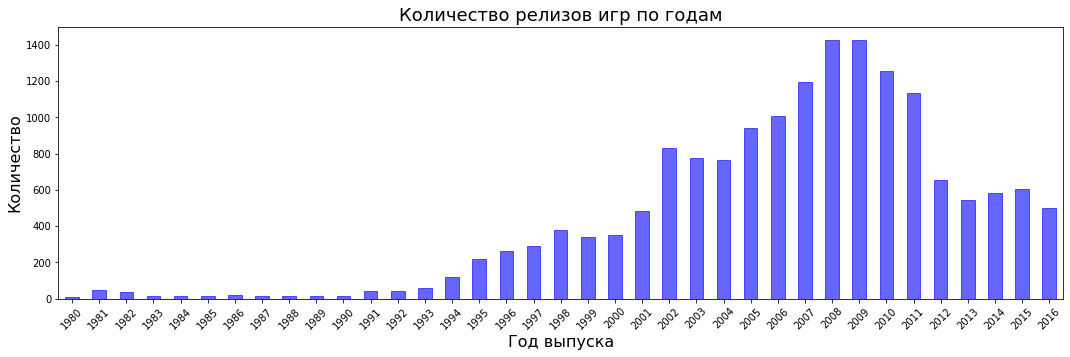

In [36]:
df_plot = df.groupby('year_of_release')['name'].agg('count')
df_plot.index.names = ['Год выпуска']
df_plot.plot(kind = 'bar',
             ec = 'b',
             color = 'b',
             alpha = .6, 
             rot = 45, 
             figsize = (18,5)) 
plt.title('Количество релизов игр по годам',  fontsize = 18)
plt.xlabel('Год выпуска', fontsize = 16)
plt.ylabel('Количество', fontsize = 16);


**Вывод**

До 1994 года и Pentium 1 игр практически не было. Потом они начали появляться, сначала на MS-DOS, потом уже на Windows. Резкий скачок по количеству игр, выпущенных в год, произошел в 2002 году. Пик - 2008-2009 года. После этого начался спад, связанный с развитием мобильных устройств, интеграция соц. сетей в жизнь людей. Это всё привело к тому, что интерес к самим играм упал, соответственно, упало и их производство.



### Количество выпущенных игр по платформам

Посмотрим на то, сколько игр выпускалось на каждую платформу за весь анализируемый период.

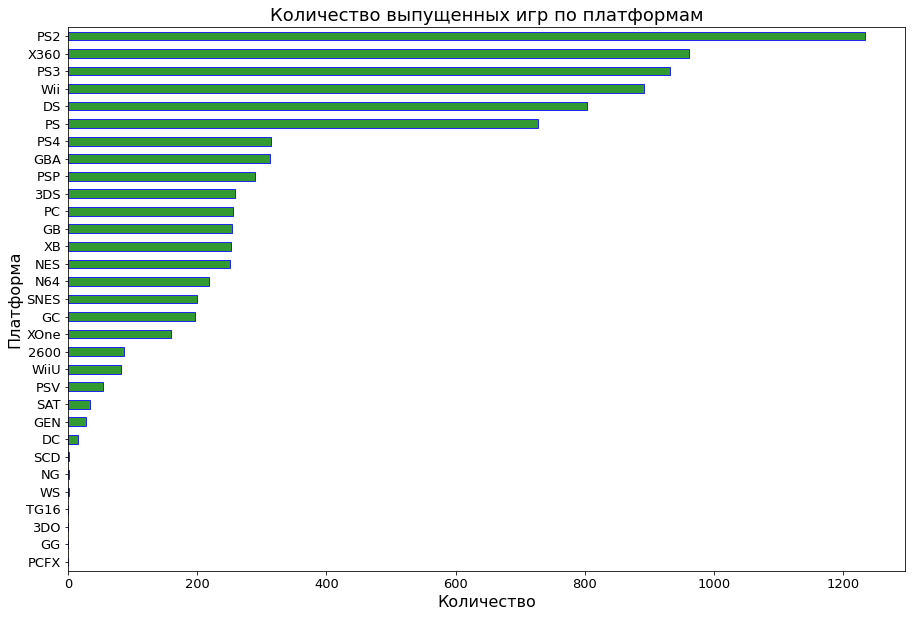

In [37]:
df_plot = df.groupby('platform')['world_sales'].agg('sum')
df_plot.sort_values().plot(kind = 'barh', 
                           color = 'g',
                           ec = 'b',
                           alpha = .8,
                           fontsize = 13,
                           figsize = (15,10))
plt.title('Количество выпущенных игр по платформам', fontsize = 18)
plt.xlabel('Количество', fontsize = 16)
plt.ylabel('Платформа', fontsize = 16);

**Вывод**

С учетом того, что это статистика до 2016 года - безусловным лидером является платформа PS2. Она имела популярность и была как минимум у каждого на слуху. Далее идут Xbox360, PS3 и Wii. Самые редкие платформы - представители японских технологий.

### Динамика продаж игр по платформам

Оставим данные только начиная с 1994 года. Именно с этого момента начинается рост рынка видеоигр.

In [38]:
platforms_leaders = df.pivot_table(index = 'platform',
                                   values = 'world_sales', 
                                   aggfunc = 'sum').sort_values(by = 'world_sales', 
                                                                ascending = False)

platforms_leaders = list(platforms_leaders.index[:5])
platforms_leaders

['PS2', 'X360', 'PS3', 'Wii', 'DS']

Рассмотрим первую пятерку платформ по годам.

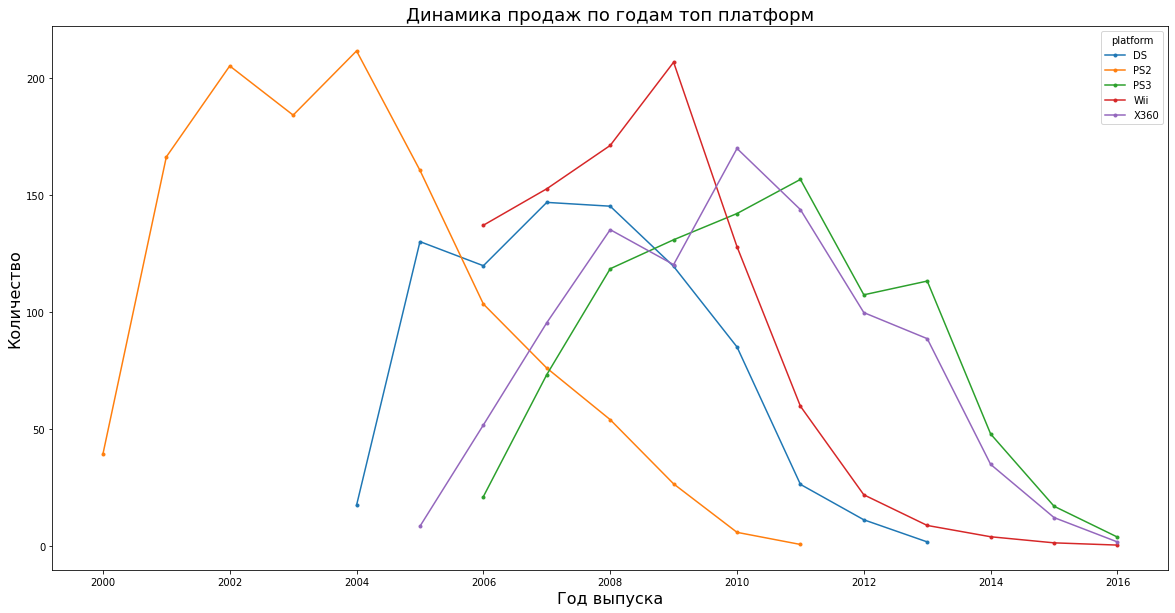

In [39]:
df.query('platform in @platforms_leaders and year_of_release >= 1994').pivot_table(index = 'year_of_release', 
                                                                                              columns = 'platform', 
                                                                                              values = 'world_sales', 
                                                                                              aggfunc = 'sum').plot(style = '.-',
                                                                                                                            figsize = (20,10))
plt.title('Динамика продаж по годам топ платформ', fontsize = 18)
plt.xlabel('Год выпуска', fontsize = 16)
plt.ylabel('Количество', fontsize = 16);

**Вывод**

Можно заметить, что каждая из платформ 'прожила' примерно по 10 лет:

- PS2 с 2000 по 2010 (в точности 10 лет)
- DS с 2004 по 2013 (9 лет)
- X360 с 2006 по 2015 (9 лет)
- Wii 2006 - 2015 (9 лет)
- PS3 2006 - 2016 (10 лет)

Таким образом, в среднем консоль живет 10 лет. Это неизбежно, т.к. прогресс идет вперед и "железо" в старых консолях перестает отвечать техническим требованиям новых игр.

### Динамика продаж в актуальный период 

Нам необходимо выбрать актуальный период - период, за который мы будем оценивать наши данные, на основании выводов по которым будем строить предсказательные модели на 2017 год. Многие новые платформы ,на тот период, появляются в 2006 году (например: Wii, PS3, X360), при этом характерный срок жизни - это 10 лет, но к 2013 году мы видим их активный спад, к тому видим рост актуальных на нынешнее время платформ, их в дальнейшем мы и будем разбирать. Таким образом на мой взгляд актульные данные начинаются с 2013 года.

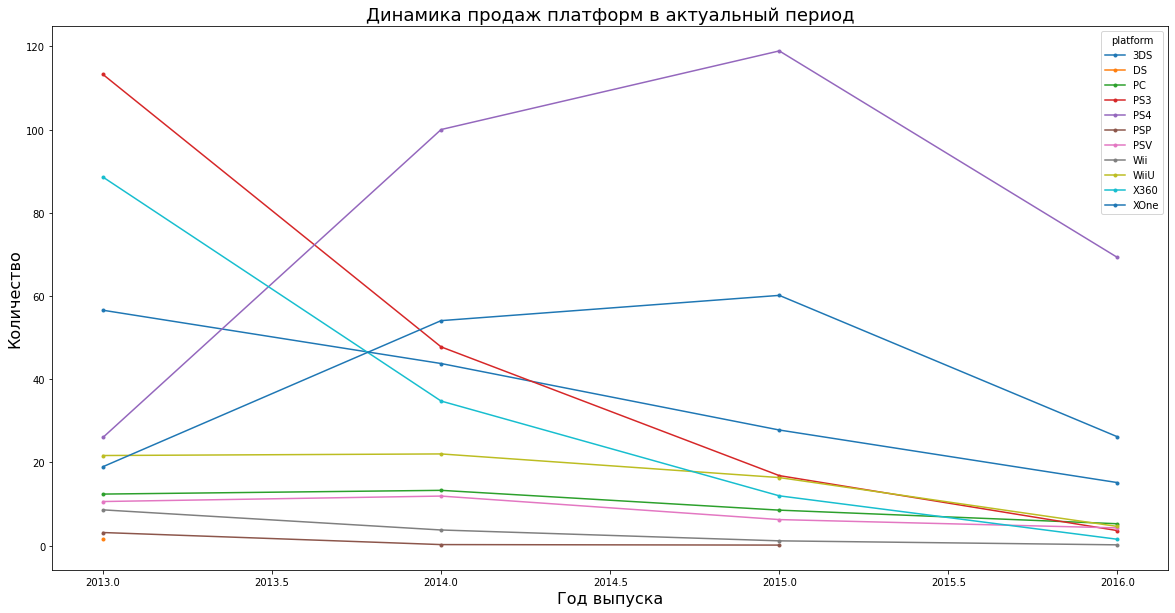

In [40]:
actual_data = df.query('year_of_release >= 2013')

actual_data.pivot_table(index = 'year_of_release', 
                                                columns = 'platform', 
                                                values = 'world_sales', 
                                                aggfunc = 'sum').plot(style = '.-',
                                                                      figsize = (20,10))
plt.title('Динамика продаж платформ в актуальный период', fontsize = 18)
plt.xlabel('Год выпуска', fontsize = 16)
plt.ylabel('Количество', fontsize = 16);

**Вывод**

На конец 2016 года лидируют по продажам следующие платформы:

- PS4;
- Xbox One;
- 3DS.


Это топ-3. Причем, исходя из данных, количество продаж игр, выпущенных на каждую из этих платформ, снижается. Таким образом, можно сказать, что весь рынок игр падает.

Потенциально не будут продаваться:

- Xbox 360;
- PS3.
- DS;
- Wii; 
- PSP.

Потому что их время уже прошло. Это консоли предыдущего поколения.

### Boxplot по глобальным продажам

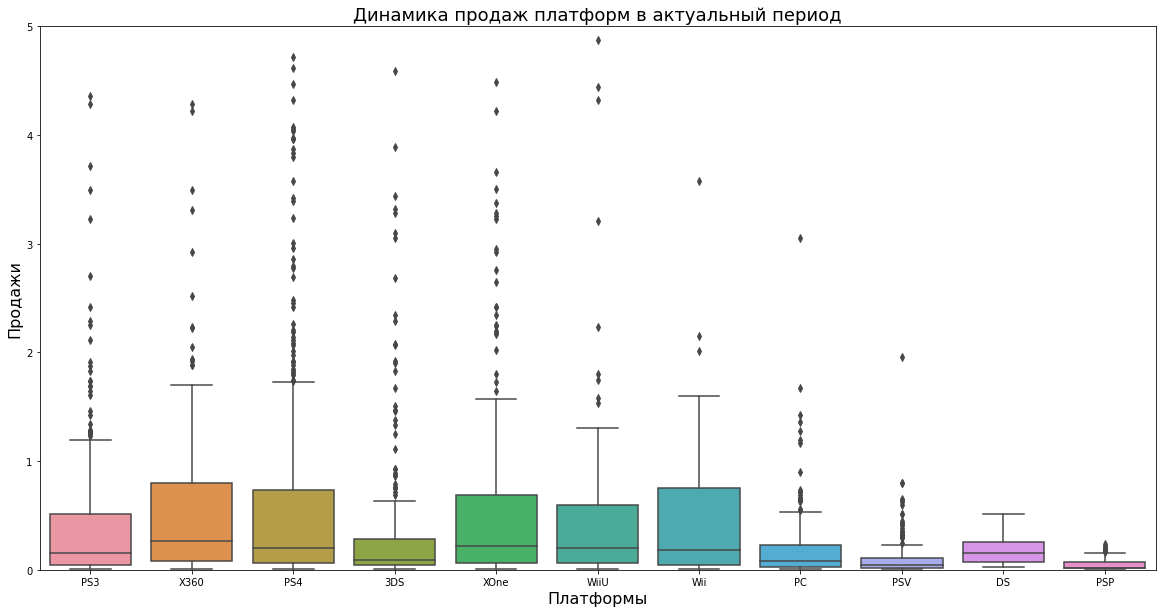

In [41]:
plt.figure(figsize = (20,10))
plt.ylim(0,5)
sns.boxplot(x = actual_data['platform'],y = actual_data['world_sales'])
plt.title('Динамика продаж платформ в актуальный период', fontsize = 18)
plt.xlabel('Платформы', fontsize = 16)
plt.ylabel('Продажи', fontsize = 16);

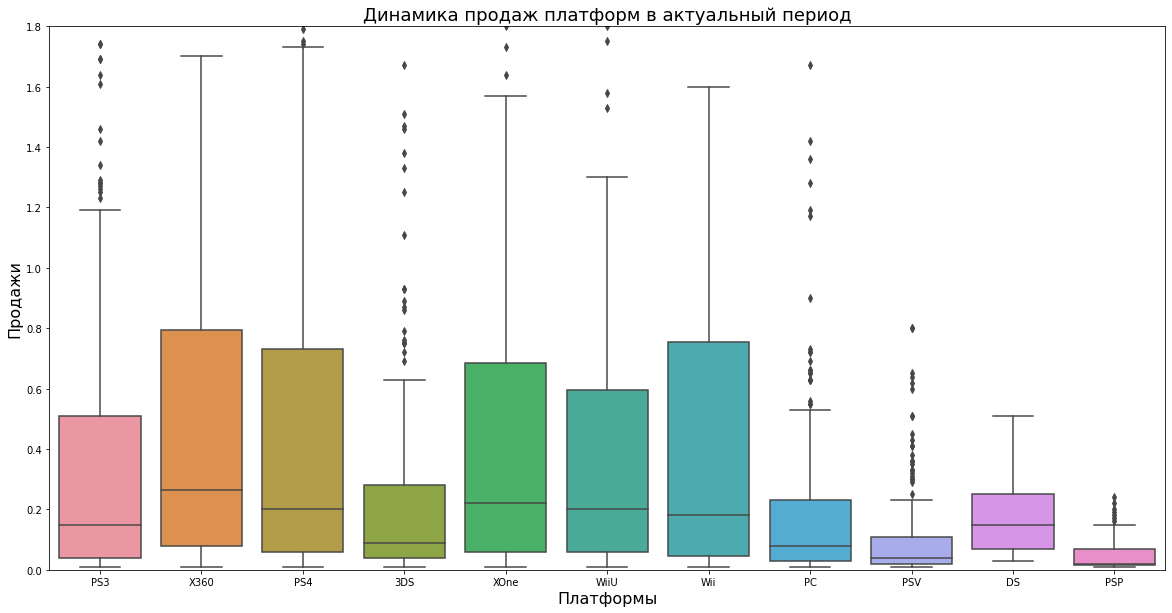

In [42]:
plt.figure(figsize = (20,10))
plt.ylim(0,1.8)
sns.boxplot(x = actual_data['platform'],y = actual_data['world_sales'])
plt.title('Динамика продаж платформ в актуальный период', fontsize = 18)
plt.xlabel('Платформы', fontsize = 16)
plt.ylabel('Продажи', fontsize = 16);   

**Вывод**

Наибольшие медианные продажи у платформ WiiU, затем Xbox One, после PS4. Положение Xbox One и PlayStation 4 можно объяснить тем, что данные приставки позднее остальных вышли на рынки. Почти у всех платформ есть много выбросов - скорее всего это игры которые многим понравились, раздавались беслпатно.

### Влияние и корреляция между отзывами и продажами

In [43]:
actual_data['critic_score'] = actual_data['critic_score'].astype('Int64')

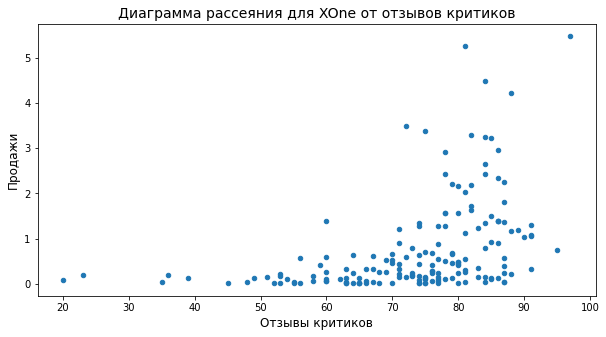

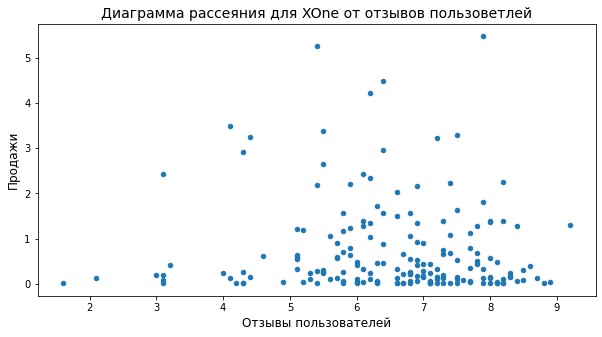

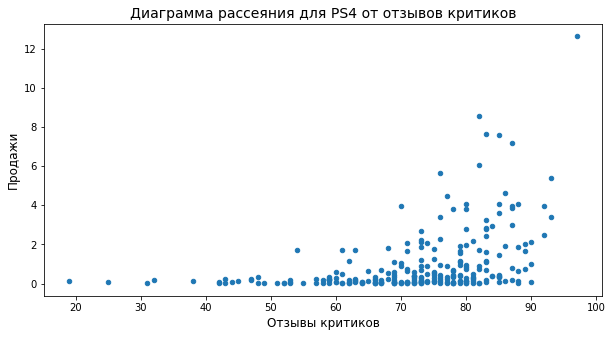

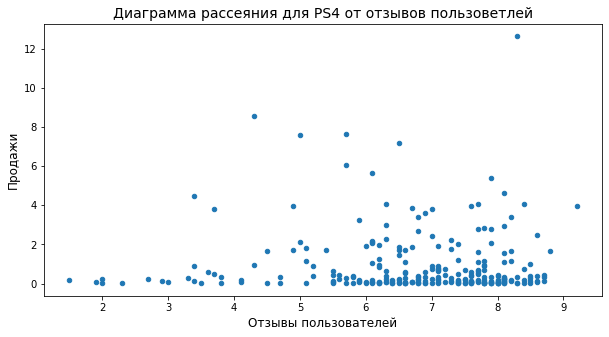

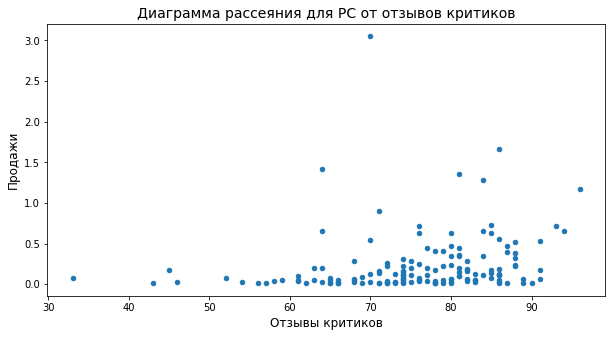

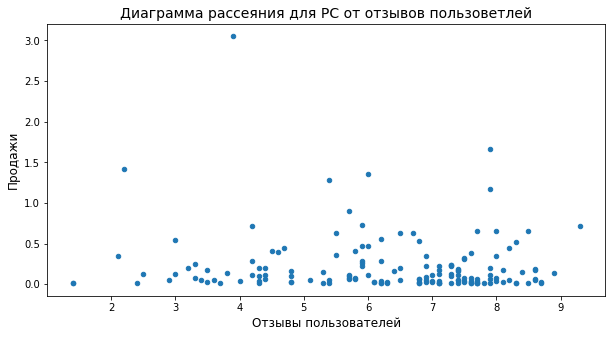

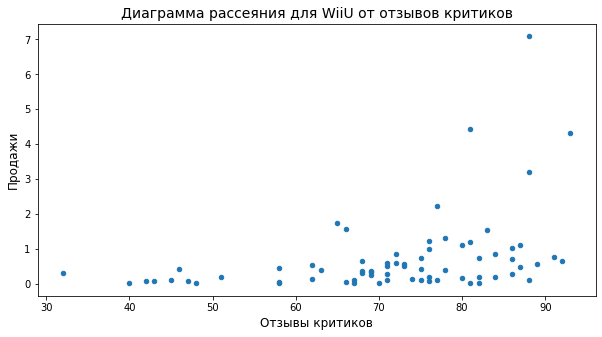

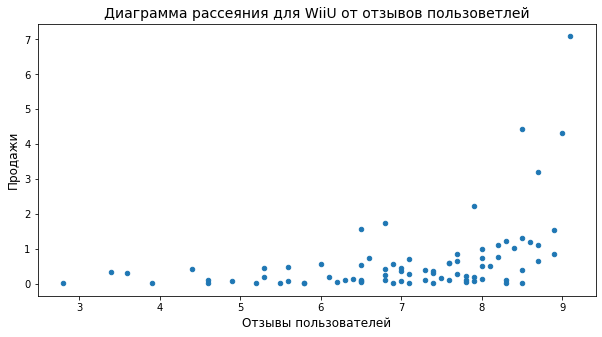

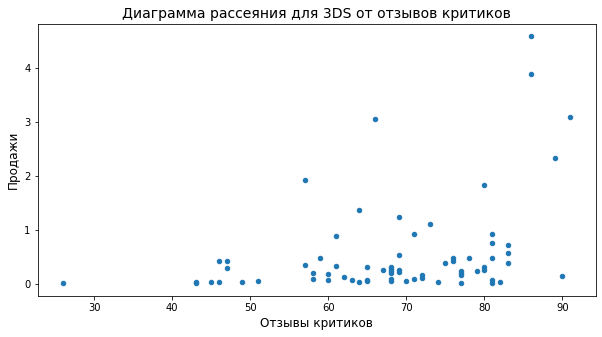

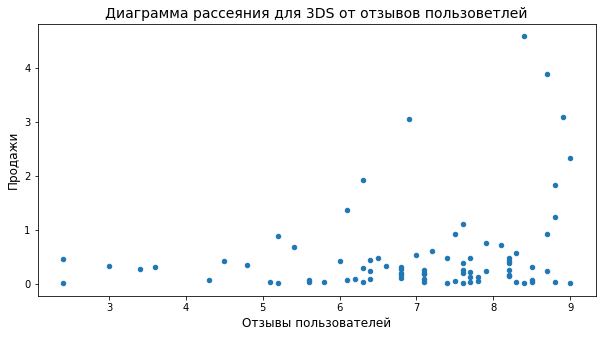

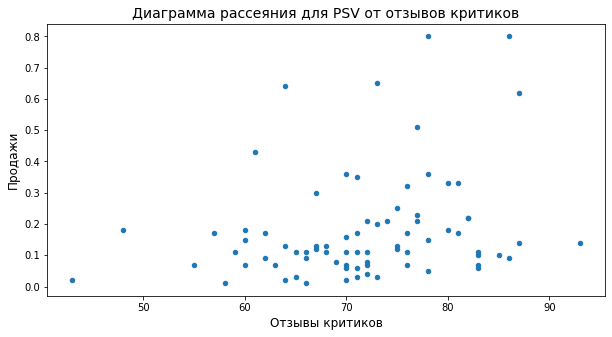

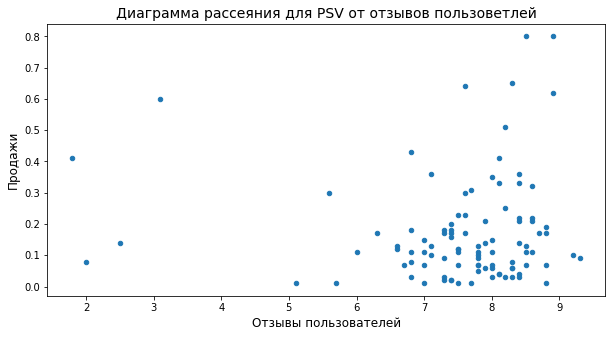

In [44]:
platforms_leaders = list(['XOne','PS4','PC','WiiU','3DS', 'PSV'])


for curr_platform in platforms_leaders:
    
        actual_data[actual_data.platform == curr_platform].sort_values(by = 'critic_score'
                        ,ascending=True).plot(kind = 'scatter',
                                              x = 'critic_score',
                                              y = 'world_sales',
                                              figsize = (10,5))

        plt.title(f'Диаграмма рассеяния для {curr_platform} от отзывов критиков', fontsize = 14)
        plt.xlabel('Отзывы критиков', fontsize = 12)
        plt.ylabel('Продажи', fontsize = 12);
    
        actual_data[actual_data.platform == curr_platform].sort_values(by = 'user_score'
                        ,ascending=True).plot(kind = 'scatter',
                                              x = 'user_score',
                                              y = 'world_sales',
                                              figsize = (10,5))

        plt.title(f'Диаграмма рассеяния для {curr_platform} от отзывов пользоветлей', fontsize = 14)
        plt.xlabel('Отзывы пользователей', fontsize = 12)
        plt.ylabel('Продажи', fontsize = 12);

        
        #print("Матрица корреляций")
        #actual_data[actual_data.platform == curr_platform][['world_sales', 'critic_score', 'user_score']].corr().style.background_gradient(cmap='coolwarm')    
plt.show()        

In [45]:
print("Матрица корреляций")
actual_data[actual_data.platform == 'XOne'][['world_sales', 'critic_score', 'user_score']].corr().style.background_gradient(cmap='coolwarm')

Матрица корреляций


,world_sales,critic_score,user_score
world_sales,1.000000,0.416998,-0.068925
critic_score,0.416998,1.000000,0.472462
user_score,-0.068925,0.472462,1.000000


In [46]:
print("Матрица корреляций")
actual_data[actual_data.platform == 'PS4'][['world_sales', 'critic_score', 'user_score']].corr().style.background_gradient(cmap='coolwarm')

Матрица корреляций


,world_sales,critic_score,user_score
world_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


In [47]:
print("Матрица корреляций")
actual_data[actual_data.platform == '3DS'][['world_sales', 'critic_score', 'user_score']].corr().style.background_gradient(cmap='coolwarm')

Матрица корреляций


,world_sales,critic_score,user_score
world_sales,1.000000,0.357057,0.241504
critic_score,0.357057,1.000000,0.769536
user_score,0.241504,0.769536,1.000000


In [48]:
print("Матрица корреляций")
actual_data[actual_data.platform == 'WiiU'][['world_sales', 'critic_score', 'user_score']].corr().style.background_gradient(cmap='coolwarm')

Матрица корреляций


,world_sales,critic_score,user_score
world_sales,1.000000,0.376415,0.419330
critic_score,0.376415,1.000000,0.721313
user_score,0.419330,0.721313,1.000000


**Вывод**

Данные по корреляции между отзывами и продажами по платформам PS2, X360, PS3, PS и Xbox One более или менее совпадает с общими данными по датафрейму.
Выделяются Wii и DS, по которым зависимость не такая большая.
Кстати, есть платформы, где оценка критиков, согласно данных, сильнее "определяет" количество продаж, чем оценка пользователей. Это платформы DS, PS4 и Xbox One. В случае с DS полагаю, что дело в том, что приставка азиатская, большую популярность она имеет там, соответственно, далеко не большая часть игроков принимает участие в оценке игр на эту платформу. Про PS4 и Xbox One - платформы довольно новые, вполне вероятно, что пользователи пока не "освоились", поэтому большого количества отзывов, особенно качественных от них нет.

### Распределение игр по жанрам

Отрисуем барплот чтобы наглядно посмотреть какие жанры лидирует, а какие остаются внизу.

df_plot = actual_data.groupby('genre').agg({'world_sales': 'mean'}).sort_values(by = 'world_sales',ascending = False).reset_index()
df_plot['world_sales'] = df_plot['world_sales'] * 100
df_plot

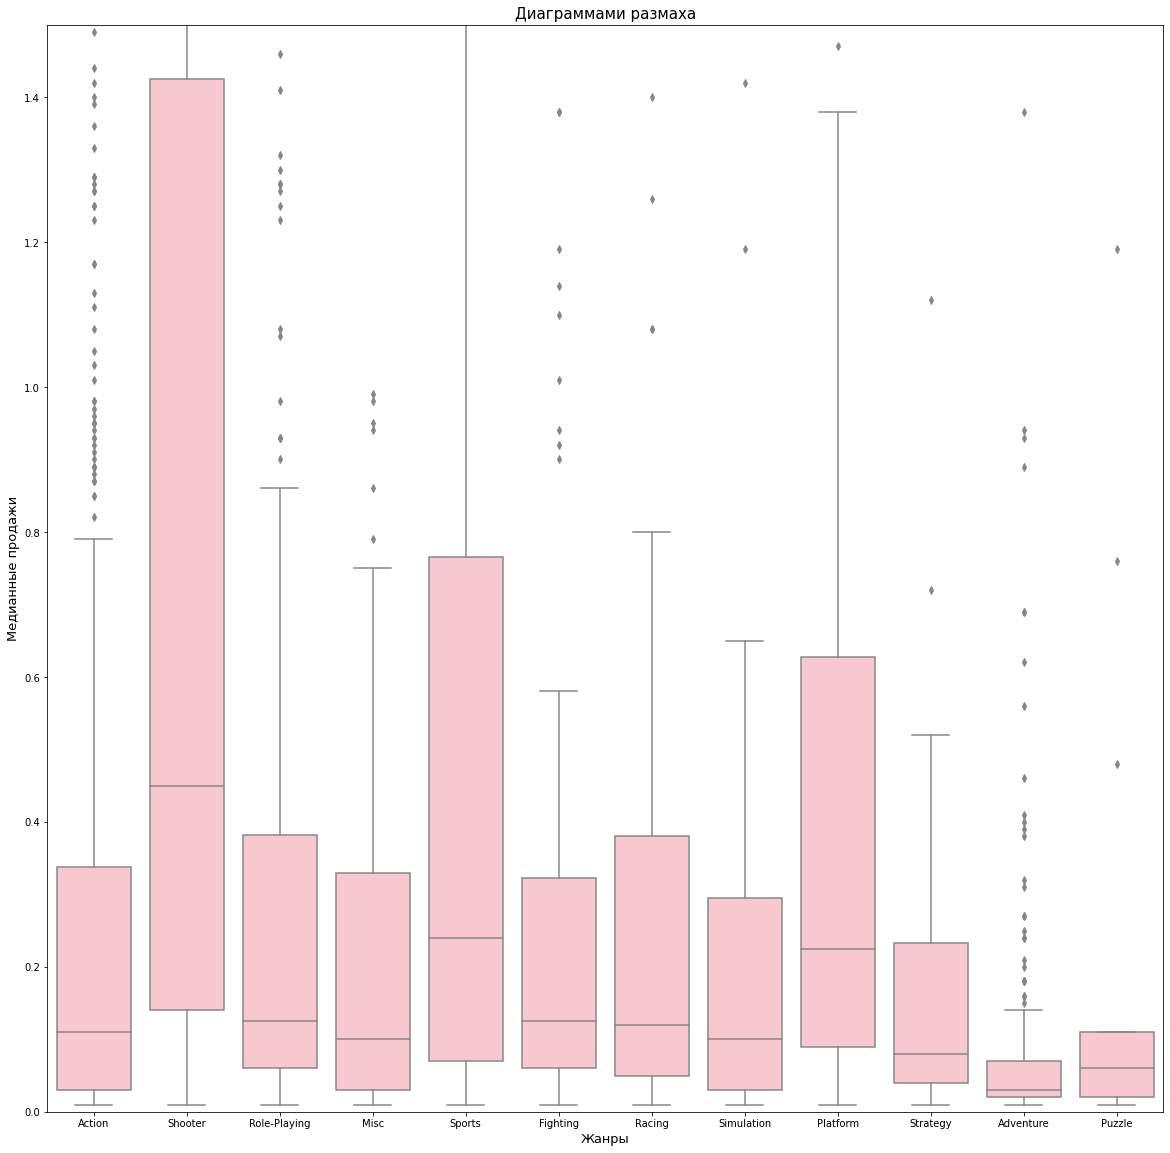

In [49]:
plt.figure(figsize = (20,20))
plt.ylim(0,1.5)
sns.boxplot( y = actual_data['world_sales'],x = actual_data['genre'], color = 'pink')
plt.title('Диаграммами размаха', fontsize = 15)
plt.xlabel('Жанры', fontsize = 13)
plt.ylabel('Медианные продажи', fontsize = 13);


In [50]:
actual_data['world_sales'].describe()

count   2233.00
mean       0.49
std        1.24
min        0.01
25%        0.03
50%        0.11
75%        0.40
max       21.05
Name: world_sales, dtype: float64

In [51]:
actual_data['genre'].unique()

array(['Action', 'Shooter', 'Role-Playing', 'Misc', 'Sports', 'Fighting',
       'Racing', 'Simulation', 'Platform', 'Strategy', 'Adventure',
       'Puzzle'], dtype=object)

ax = plt.gca()

df_plot = actual_data.groupby('genre').agg({'name':'count', 
                                            'world_sales':'mean'}).sort_values(by = 'name', 
                                                                              ascending = False).reset_index()


plot1 = df_plot['name']
plot1.plot(kind = 'bar', 
           ec = 'black',
           ax = ax,
           alpha = .5, 
           rot = 0, 
           width = 0.4, 
           color = 'g', 
           figsize = (15,5), 
           position = 0)


plot2 = df_plot['world_sales']
plot2.plot(kind = 'bar', 
           ec = 'black', 
           ax = ax,
           alpha = .5, 
           rot = 0, 
           width = 0.4, 
           color = 'b',
           figsize = (15,5),  
           position = 1)

plt.legend(['Количество продаж', 'Общая сумма продаж'])
plt.title('Распределение игр по жанрам', fontsize = 15)
plt.xlabel('Жанры', fontsize = 13)
plt.ylabel('Продажи', fontsize = 13);

**Вывод**

Больше всего игр жанра Shooter. За ними идут игры спортивного жанра и игры жанра "Platform".

## Портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):

- Самые популярные платформы (топ-5), опишем различия в долях продаж;
- Самые популярные жанры (топ-5), поясним разницу;
- Определим, влияет ли рейтинг ESRB на продажи в отдельном регионе.

### Самые популярные платформы в каждом регионе

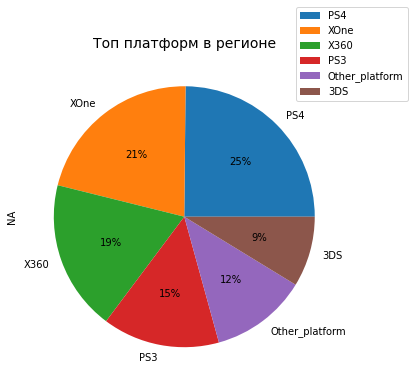

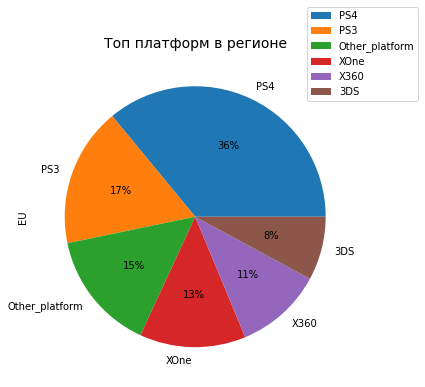

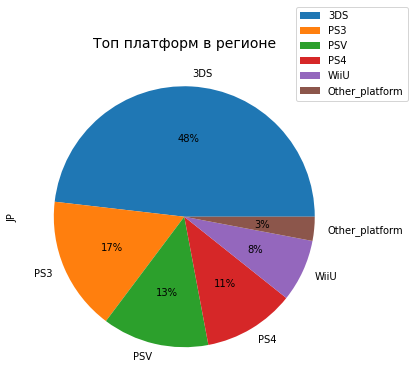

In [52]:
region_list = list(['na_sales','eu_sales','jp_sales'])

for curr_region in region_list:
    sales_platform = actual_data.groupby('platform')[curr_region].sum().reset_index().sort_values( by = curr_region, 
                                                                                                  ascending = False,
                                                                                                  ignore_index = True)
    new_row = {'platform':'Other_platform', curr_region : sales_platform[curr_region].loc[5:].sum()}
    sales_platform = sales_platform.append(new_row, ignore_index= True).sort_values(by = curr_region, 
                                                                                    ascending = False,
                                                                                    ignore_index = True)
    sales_platform = sales_platform.loc[:5]
    sales_platform.plot(kind='pie', 
                        figsize = (6,6),
                        labels = sales_platform['platform'],
                        y = curr_region,
                        autopct='%1.0f%%')
    plt.legend( loc = 'right', bbox_to_anchor = (1.2,1.0))
    plt.ylabel(curr_region.split('_')[0].upper())
    plt.title('Топ платформ в регионе', fontsize = 14);

**Вывод**

В Северной Америке лидируют приставки прошлого поколения Xbox One и PS4. За ними идут их предыдщуие поколения приставок - Xbox 360 и PS3. Топ-4 - другие платформы, а топ-5 - DS соответственно.

В Европе одинаково популярны PS4 и PS3. За ними идут другие платформы. А X360 и Xbox One - занимают Топ-4 и Топ-5. Закрывает топ платформа 3DS.

В Японии, как обычно, всё наоборот. Лидер c огромным отрывом - 3DS. За ними американские PS3, PSV и PS4. Далее WiiU и другие платформы.

### Самые популярные жанры в каждом регионе

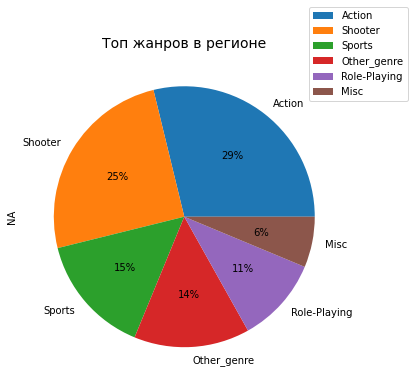

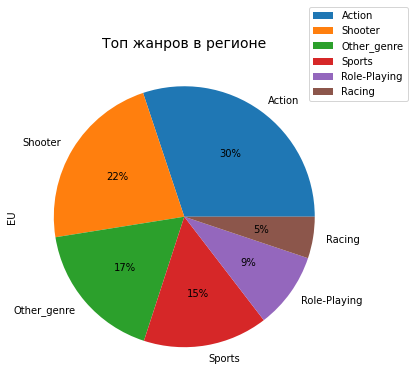

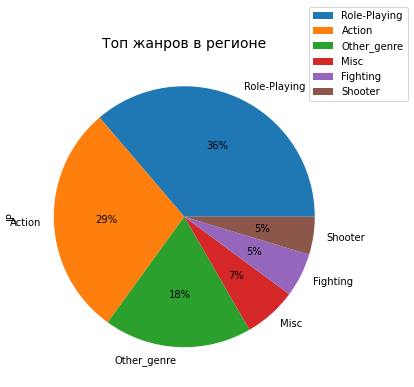

In [53]:
region_list = list(['na_sales','eu_sales','jp_sales'])

for curr_region in region_list:
    sales_genre = actual_data.groupby('genre')[curr_region].sum().reset_index().sort_values( by = curr_region, 
                                                                                                  ascending = False,
                                                                                                  ignore_index = True)
    new_row = {'genre':'Other_genre', curr_region : sales_genre[curr_region].loc[5:].sum()}
    sales_genre = sales_genre.append(new_row, ignore_index= True).sort_values(by = curr_region, 
                                                                                    ascending = False,
                                                                                    ignore_index = True)
    sales_genre = sales_genre.loc[:5]
    sales_genre.plot(kind='pie', 
                        figsize = (6,6),
                        labels = sales_genre['genre'],
                        y = curr_region,
                        autopct='%1.0f%%')
    plt.legend( loc = 'right', bbox_to_anchor = (1.2,1.0))
    plt.ylabel(curr_region.split('_')[0].upper())
    plt.title('Топ жанров в регионе', fontsize = 14);

**Вывод**

Вкусы в Северной Америке и Европе схожи: и там, и там живут фанаты экшнов, спортивных игр и шутеров. В Северной Америке больше играют в платформеры, в Европе же чаще выбирают гонки.


В Японии вкус совершенно иной - на первом месте ролевые игры, причем с большим отрывом. Далее экшны и спортивные игры.

### Влияние рейтинга ESRB на продажи в каждом регионе

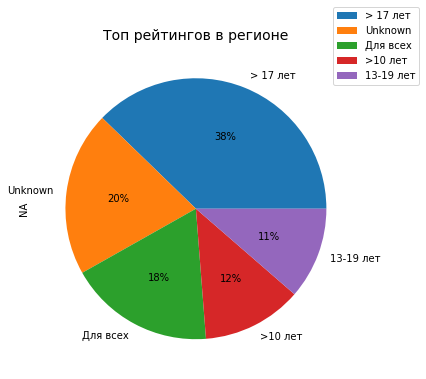

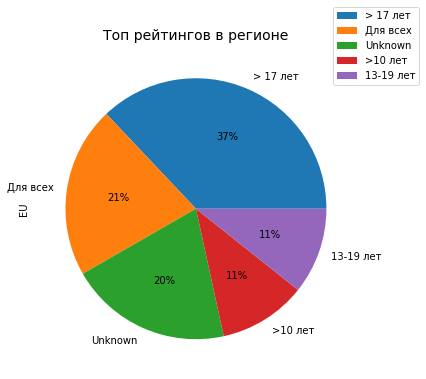

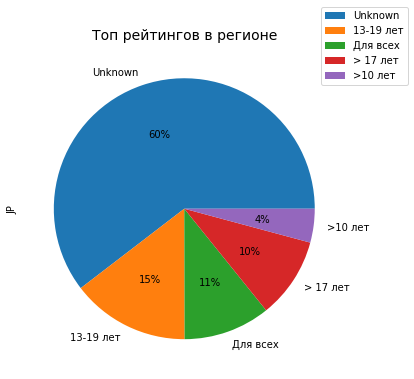

In [54]:
region_list = list(['na_sales','eu_sales','jp_sales'])

for curr_region in region_list:
    sales_rating = actual_data.groupby('rating')[curr_region].sum().reset_index().sort_values( by = curr_region, 
                                                                                                  ascending = False,
                                                                                                  ignore_index = True)
    new_row = {'rating':'Other_rating', curr_region : sales_rating[curr_region].loc[5:].sum()}
    sales_genre = sales_rating.append(new_row, ignore_index= True).sort_values(by = curr_region, 
                                                                                    ascending = False,
                                                                                    ignore_index = True)
    sales_rating = sales_rating.loc[:5]
    sales_rating['rating'] = sales_rating['rating'].replace({'E': 'Для всех', 'M': '> 17 лет', 'T': '13-19 лет', 'E10+': '>10 лет'})
    sales_rating.plot(kind='pie', 
                        figsize = (6,6),
                        labels = sales_rating['rating'],
                        y = curr_region,
                        autopct='%1.0f%%')
    plt.legend( loc = 'right', bbox_to_anchor = (1.2,1.0))
    plt.ylabel(curr_region.split('_')[0].upper())
    plt.title('Топ рейтингов в регионе', fontsize = 14);

**Вывод**

В Северной Америке и в Европе картина практически одинаковая. Большая часть выручки получено с игр с рейтингом "для лиц старше 17 лет", примерно поровну с играми у которых по тем или иным причинам не указан рейтинг. Дальше с рейтингом "старше 10 лет" и "13-19 лет". Особого влияния ESRB тут не заметно, хотя в США она почти обязательная, она рекомендательная. Она больше нужна продавцам, кто реализуют игры. Рейтинговые ассоциации  ESRB и PEGI(Европейская рейтинговая система игр) очень похожи по рейтинговой системе.

В Японии опять же не так. Первое место занимают игры "без рейтинга". "13-19 лет" на втором. Далее игры с рейтингом "Для всех", "для лиц старше 17 лет" и "старше 10 лет". CERO - Японская некоммерческая организация, занимающаяся присуждением рейтингов компьютерным играм и программному обеспечению для их последующей продажи на территории Японии. 

## Проверка гипотез

**Гипотезы:**

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- Средние пользовательские рейтинги жанров Action и Sports разные.

### Гипотеза № 1


Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

**Н0 (нулевая гипотеза)** - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

**Н1 (альтернативная гипотеза)** - средние пользовательские рейтинги платформ Xbox One и PC отличаются между собой.

In [55]:
XOne = actual_data[(actual_data['platform'] == 'XOne') &  (actual_data['user_score'] > 0)]['user_score']
PC = actual_data[(actual_data['platform'] == 'PC') &  (actual_data['user_score'] > 0)]['user_score']
print('Средний пользовательский рейтинг платформы Xbox One:', XOne.mean())
print('Средний пользовательский рейтинг платформы PC', PC.mean())

Средний пользовательский рейтинг платформы Xbox One: 6.521428571428572
Средний пользовательский рейтинг платформы PC 6.2696774193548395


**Проверяем первую гипотезу**

In [56]:
#проверяем первую гипотезу

alpha = .05

results = st.ttest_ind(XOne, PC, equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


**Вывод**

Отвергаем нулевую гипотезу. Средние пользовательские рейтинги платформ Xbox One и PC разные.

### Гипотеза № 2


Средние пользовательские рейтинги платформ Xbox One и PC разные.

**Н0 (нулевая гипотеза)** - средние пользовательские рейтинги жанров Action и Sports одинаковые.

**Н1 (альтернативная гипотеза)** - средние пользовательские рейтинги жанров Action и Sports отличаются между собой.

In [57]:
Action = actual_data[(actual_data['genre'] == 'Action') &  (actual_data['user_score'] > 0)]['user_score']
Sports = actual_data[(actual_data['genre'] == 'Sports') &  (actual_data['user_score'] > 0)]['user_score']
print('Средний пользовательский рейтинг жанра Action:', Action.mean())
print('Средний пользовательский рейтинг жанра Sports', Sports.mean())

Средний пользовательский рейтинг жанра Action: 6.837532133676092
Средний пользовательский рейтинг жанра Sports 5.238124999999999


**Проверяем вторую гипотезу**

In [58]:
alpha = .05

results = st.ttest_ind(Action, Sports, equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


**Вывод**

Отвергаем нулевую гипотезу. Таким образом, остается верным утверждение, что средние пользовательские рейтинги жанров Action и Sports разные.

### Пояснение

**Как вы сформулировали нулевую и альтернативную гипотезы**

Формулирование гипотез начинал с формулировки нулевой гипотезы (H₀).Исходя из H₀ формулируется альтернативная гипотеза(H₁). Это утверждение, которое принимается верным, если отбрасывается H₀.


**Какой критерий применили для проверки гипотез и почему**
Сформулировал двустороннюю гипотезу. Значение статистической значимости я задал 5%. 
Для проверки обеих гипотез будем использовать t-критерий Стьюдента, так как в обоих случаях выборки независимы  между собой.

## Общий вывод

В ходе проделанной работы было выполнено:

1. Просмотрена таблица, выявлены аномалии и пропущенные значения.
2. Проведена предобработка таблицы: замена столбцов, заполнение пропусков, удаление дубликатов и т.д.
3. Проведен анализ по данным и подготовлены актуальные данные.
4. Составлены портреты пользователей для купных регионов продаж.
5. Выполнены проверки гипотез.

Продажи компьютерных игр зависят от трех основных составляющих: кто игру создал, на какой платформе она сделана и какого она жанра.

- По первому пунку сейчас популярны компании, которые уже давно разрабатывают игры. Они используют свои любимые жанры и уже накопили аудиторию фанатов, которая обязательно купит их игру.
- Платформа определяет технические возможности разработчиков. Здесь есть прямая зависимость: лучше платформа значит можно сделать игру лучше. Жизненный цикл в 5-12 лет обусловлен скачками в технологиях процессора, оперативной и видеопамяти.
- Жанр - это то, что выбирает игрок. Каждый человек уникален, и не каждому игроку будет по душе одновременно стратегия и шутеры. Соответсвенно студии-разработчики и издатели боряться за целевую аудиторию своего продукта.

Анализ для кампании на 2017 год.

1. Делать ставку на современные платформы. Покупать вышедшие и новые игры на PS4, XOne и 3DS.
2. Выставлять на прилавки популярные жанры - экшен, шутеры, спортивные и ролевые игры.
3. Следить за своей аудиторией. В основом большинство игр рассчитано на игроков, которым 17 лет и старше.
4. Не забывать распространять компьютерные игры и портации игр с популярных платформ на PC. Компьютер еще долго не выйдет из конкуренции за игроков.